# 

<div align="center">

## Proyecto Modulo 1.- El *TITANIC* **EDA**

<div>

## **Introducción**

##### En este proyecto, hemos realizado un análisis exhaustivo de los datos del Titanic para identificar los factores que influenciaron la supervivencia de los pasajeros. Utilizamos técnicas avanzadas de análisis de datos y visualización para desentrañar patrones y tendencias. Nuestro objetivo es encontrar respuestas concluyentes sobre cómo las clases sociales afectaron las probabilidades de supervivencia.


In [2]:
#importamos librerias necesarias.
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from IPython.display import Image, display, HTML
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')

##### 1. Creamos y visualizamos nuestro df, a raiz del csv que optimizamos en el Procesamiento de datos

In [6]:
# Crear el DataFrame a partir del archivo CSV
df_Knn = pd.read_csv('')
df_Knn.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName
0,False,3,"Braund, Mr. Owen Harris",male,22,1,0,523,-0.502445,S,Braund
1,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,596,0.786845,C,Cumings
2,True,3,"Heikkinen, Miss. Laina",female,26,0,0,669,-0.488854,S,Heikkinen
3,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,49,0.420730,S,Futrelle
4,False,3,"Allen, Mr. William Henry",male,35,0,0,472,-0.486337,S,Allen


##### 2. Número de viajeros y número de supervivientes.

Total de pasajeros: 891
Supervivientes: 342
No supervivientes: 549


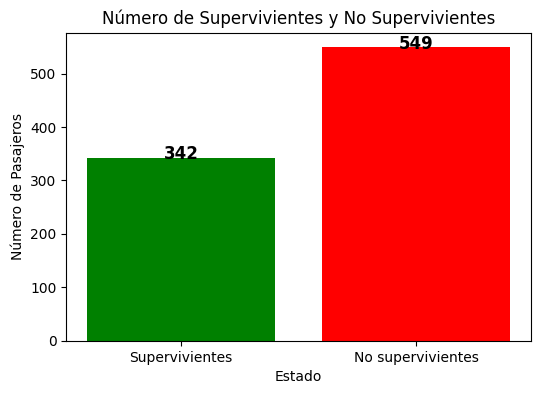

In [10]:
# Número total de pasajeros
total_passengers = df_Knn.shape[0]

# Número de supervivientes y no supervivientes
survived_count = df_Knn['Survived'].sum()
not_survived_count = total_passengers - survived_count

print(f"Total de pasajeros: {total_passengers}")
print(f"Supervivientes: {survived_count}")
print(f"No supervivientes: {not_survived_count}")

# Datos para la gráfica
labels = ['Supervivientes', 'No supervivientes']
counts = [survived_count, not_survived_count]

# Crear la gráfica de barras
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts, color=['green', 'red'])

# Añadir etiquetas a las barras con color negro
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 10, count, ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')

plt.xlabel('Estado')
plt.ylabel('Número de Pasajeros')
plt.title('Número de Supervivientes y No Supervivientes')
plt.show()


## Objetivo del Análisis

El propósito de nuestro análisis es ilustrar el impacto que las clases sociales tuvieron en la supervivencia de los pasajeros del Titanic. A continuación, exploraremos cómo se distribuían estas clases a bordo del transatlántico y qué patrones emergen de esta distribución.


In [11]:
# Contar el número de pasajeros por clase
passengers_per_class = df_Knn['Pclass'].value_counts()

print(passengers_per_class)


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


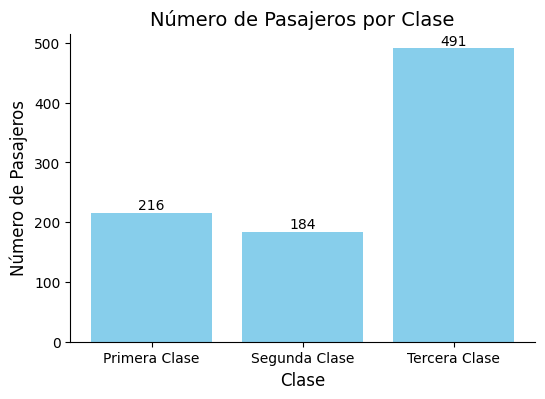

In [12]:
# Contar el número de pasajeros por clase
passengers_per_class = df_Knn['Pclass'].value_counts()

# Crear la gráfica de barras minimalista
plt.figure(figsize=(6, 4))
bars = plt.bar(passengers_per_class.index, passengers_per_class.values, color='skyblue')

# Añadir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', color='black')

# Títulos y etiquetas
plt.title('Número de Pasajeros por Clase', fontsize=14)
plt.xlabel('Clase', fontsize=12)
plt.ylabel('Número de Pasajeros', fontsize=12)
plt.xticks([1, 2, 3], ['Primera Clase', 'Segunda Clase', 'Tercera Clase'])

# Eliminar bordes superiores y laterales
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar la gráfica
plt.show()


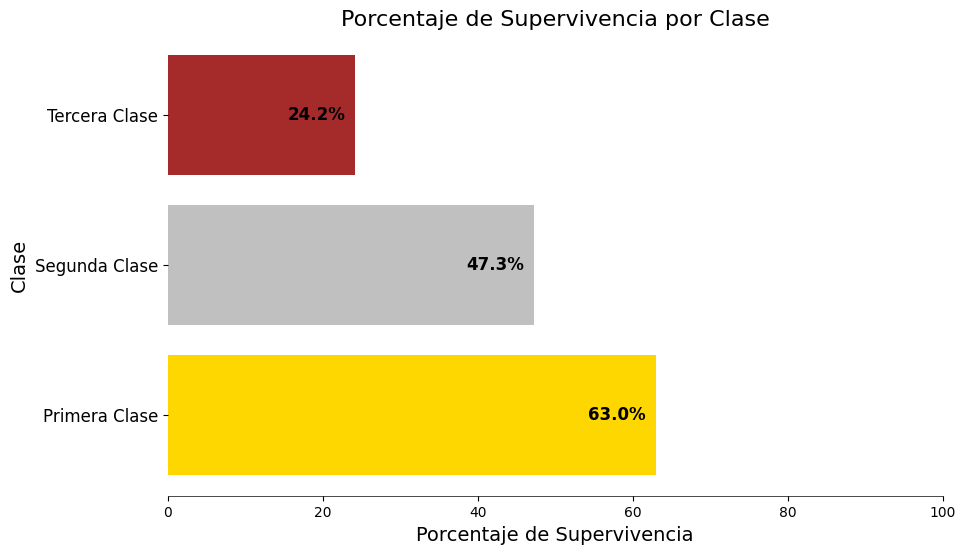

In [13]:
# Agrupar por clase y calcular porcentajes de supervivencia
pclass_survival = df_Knn.groupby('Pclass')['Survived'].mean() * 100

# Crear la gráfica de barras horizontales
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(pclass_survival.index, pclass_survival.values, color=['gold', 'silver', 'brown'])

# Añadir títulos y etiquetas
ax.set_title('Porcentaje de Supervivencia por Clase', fontsize=16)
ax.set_xlabel('Porcentaje de Supervivencia', fontsize=14)
ax.set_ylabel('Clase', fontsize=14)
ax.set_xlim(0, 100)
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['Primera Clase', 'Segunda Clase', 'Tercera Clase'], fontsize=12)

# Añadir etiquetas de porcentaje en cada barra
for bar in bars:
    width = bar.get_width()
    ax.text(width - 5, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', ha='center', va='center', color='black', fontsize=12, fontweight='bold')

# Mejorar la apariencia de la gráfica
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)

plt.show()

---

### Porcentaje de Supervivencia por Clase

Esta gráfica horizontal ilustra el porcentaje de supervivencia de los pasajeros del Titanic según su clase de viaje. Cada barra representa una clase diferente, con colores específicos para destacar visualmente la comparación:

- **Primera Clase (Oro)**: Los pasajeros de primera clase tuvieron la tasa de supervivencia más alta.
- **Segunda Clase (Plata)**: La segunda clase muestra una tasa de supervivencia intermedia.
- **Tercera Clase (Bronce)**: Los pasajeros de tercera clase presentaron la tasa de supervivencia más baja.

Esta visualización resalta claramente cómo la clase socioeconómica influenció las probabilidades de supervivencia durante el desastre del Titanic.

---

### Relación entre el Coste del Billete y la Supervivencia

Ahora que hemos analizado el índice de supervivencia por clase, procederemos a investigar si el coste del billete también tuvo un impacto significativo en las probabilidades de supervivencia. Evaluar cómo las tarifas pagadas pudieron influir en este trágico evento nos permitirá obtener una visión más profunda de las disparidades socioeconómicas a bordo del Titanic.



Fare_Quartile
Barato        19.730942
Medio-Bajo    30.357143
Medio-Alto    45.495495
Caro          58.108108
Name: Survived, dtype: float64


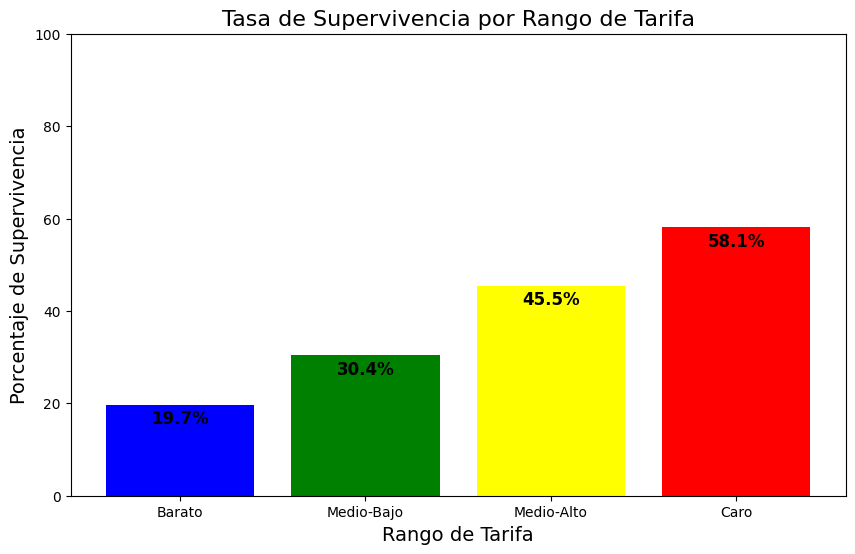

In [14]:
# Definir cuartiles para las tarifas
df_Knn['Fare_Quartile'] = pd.qcut(df_Knn['Fare'], 4, labels=['Barato', 'Medio-Bajo', 'Medio-Alto', 'Caro'])

# Calcular la tasa de supervivencia para cada cuartil
fare_survival = df_Knn.groupby('Fare_Quartile')['Survived'].mean() * 100

print(fare_survival)

# Visualizar las tasas de supervivencia por cuartil
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(fare_survival.index, fare_survival.values, color=['blue', 'green', 'yellow', 'red'])

# Añadir títulos y etiquetas
ax.set_title('Tasa de Supervivencia por Rango de Tarifa', fontsize=16)
ax.set_xlabel('Rango de Tarifa', fontsize=14)
ax.set_ylabel('Porcentaje de Supervivencia', fontsize=14)
ax.set_ylim(0, 100)

# Añadir etiquetas de porcentaje en cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height - 5, f'{height:.1f}%', ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')

plt.show()


### Tasa de Supervivencia por Rango de Tarifa

La gráfica siguiente representa la tasa de supervivencia de los pasajeros del Titanic desglosada por cuartiles de tarifa. Cada barra muestra el porcentaje de supervivencia para diferentes rangos de tarifas pagadas:

- **Barato:** Tarifa baja
- **Medio-Bajo:** Tarifa medio-baja
- **Medio-Alto:** Tarifa medio-alta
- **Caro:** Tarifa alta

#### Observaciones Clave
- Los pasajeros que pagaron tarifas más altas (`Caro`) tuvieron una mayor tasa de supervivencia.
- A medida que la tarifa pagada disminuye, también disminuye la tasa de supervivencia.

Esta visualización subraya cómo el coste del billete influyó significativamente en las probabilidades de supervivencia, evidenciando las disparidades socioeconómicas a bordo del Titanic.

---

## Supervivencia del sexo femenino

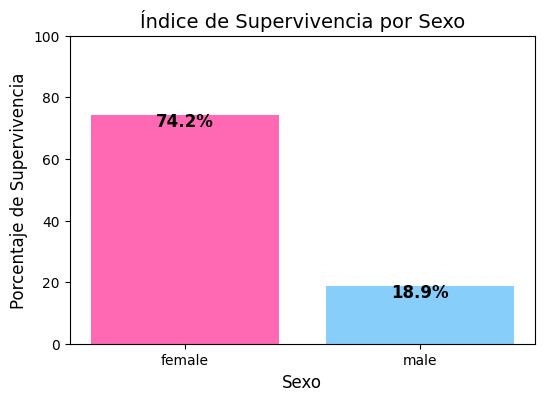

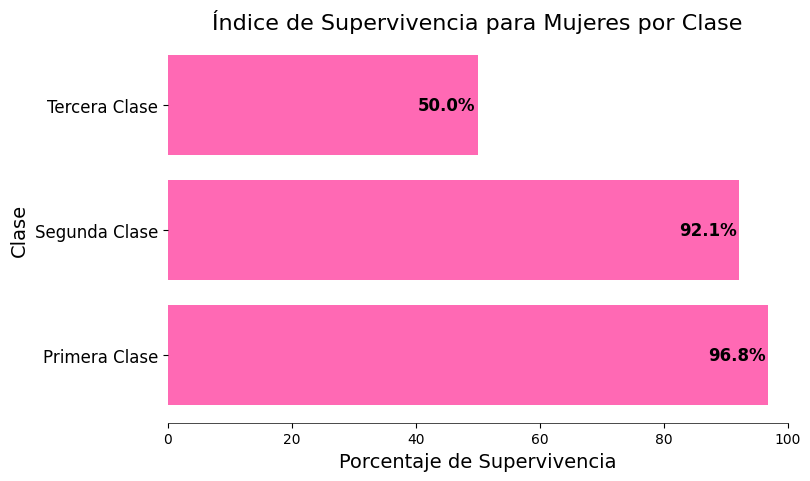

In [15]:
# Calcular el índice de supervivencia por sexo
sex_survival = df_Knn.groupby('Sex')['Survived'].mean() * 100

# Visualizar el índice de supervivencia por sexo
plt.figure(figsize=(6, 4))
bars = plt.bar(sex_survival.index, sex_survival.values, color=['#FF69B4', '#87CEFA'])  # Rosa para mujeres, azul para hombres
for bar, count in zip(bars, sex_survival.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{count:.1f}%', ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')
plt.title('Índice de Supervivencia por Sexo', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Porcentaje de Supervivencia', fontsize=12)
plt.ylim(0, 100)
plt.show()

# Calcular el índice de supervivencia para mujeres por clase
women_survival_by_class = df_Knn[df_Knn['Sex'] == 'female'].groupby('Pclass')['Survived'].mean() * 100

# Visualizar el índice de supervivencia para mujeres por clase
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(women_survival_by_class.index, women_survival_by_class.values, color='#FF69B4')  # Rosa para mujeres
for bar in bars:
    width = bar.get_width()
    ax.text(width - 5, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
ax.set_title('Índice de Supervivencia para Mujeres por Clase', fontsize=16)
ax.set_xlabel('Porcentaje de Supervivencia', fontsize=14)
ax.set_ylabel('Clase', fontsize=14)
ax.set_xlim(0, 100)
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['Primera Clase', 'Segunda Clase', 'Tercera Clase'], fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
plt.show()


### Análisis del Índice de Supervivencia por Sexo y Clase

#### Índice de Supervivencia por Sexo
La siguiente gráfica muestra el índice de supervivencia de los pasajeros del Titanic, desglosado por sexo. Observamos una tasa significativamente mayor de supervivencia entre las mujeres, lo cual concuerda con las políticas de "mujeres y niños primero" implementadas durante el desastre.


#### Índice de Supervivencia para Mujeres por Clase
Esta gráfica se centra en la tasa de supervivencia de las mujeres, analizando cómo la clase socioeconómica influyó en sus probabilidades de supervivencia. Los resultados son los siguientes:

- **Primera Clase:** Las mujeres de primera clase muestran la tasa de supervivencia más alta.
- **Segunda Clase:** Las mujeres de segunda clase presentan una tasa de supervivencia intermedia.
- **Tercera Clase:** Las mujeres de tercera clase tienen la tasa de supervivencia más baja.



#### Conclusión
Este análisis evidencia que tanto el género como la clase socioeconómica tuvieron un impacto significativo en las probabilidades de supervivencia durante el desastre del Titanic. Las políticas de rescate priorizaron a las mujeres, y las clases socioeconómicas superiores tuvieron mayores ventajas en términos de acceso a recursos de rescate.

---



### Análisis de Supervivencia por Grupo de Edad

En esta sección, analizaremos cómo la edad de los pasajeros del Titanic influyó en sus probabilidades de supervivencia. Dividiremos a los pasajeros en distintos grupos de edad para identificar patrones y tendencias que nos permitan comprender mejor las dinámicas de supervivencia entre diferentes segmentos etarios.






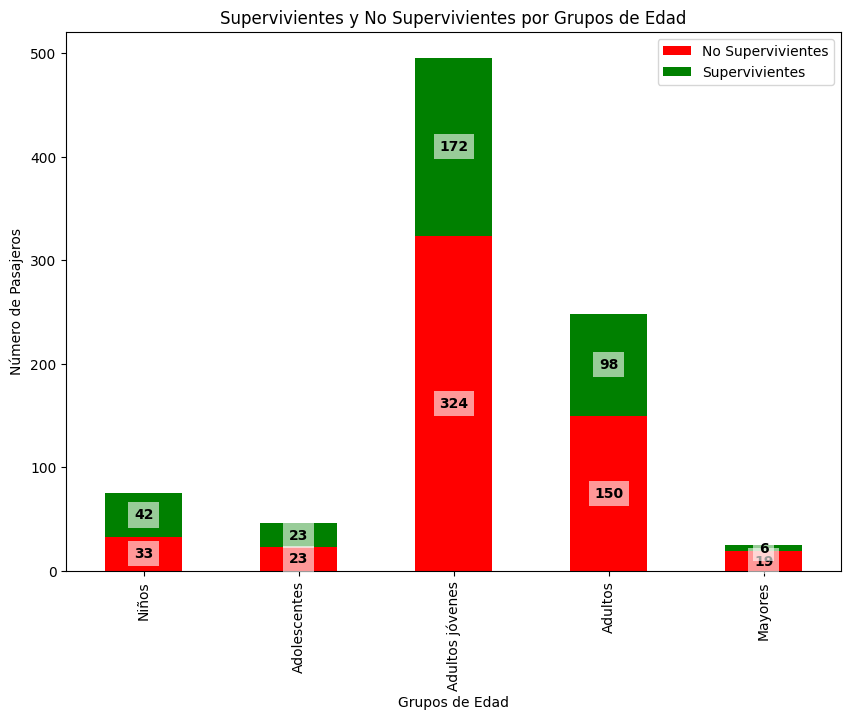

In [18]:
# Crear los grupos de edad
bins = [0, 12, 18, 35, 60, 80]
labels = ['Niños', 'Adolescentes', 'Adultos jóvenes', 'Adultos', 'Mayores']
df_Knn['AgeGroup'] = pd.cut(df_Knn['Age'], bins=bins, labels=labels, right=False)

# Agrupar por grupos de edad y estado de supervivencia
age_group_survival = df_Knn.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)

# Crear la gráfica de barras
fig, ax = plt.subplots(figsize=(10, 7))
age_group_survival.plot(kind='bar', stacked=True, color=['red', 'green'], ax=ax)

# Añadir bocadillos con números
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center', color='black', fontsize=10, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

plt.title('Supervivientes y No Supervivientes por Grupos de Edad')
plt.xlabel('Grupos de Edad')
plt.ylabel('Número de Pasajeros')
plt.legend(['No Supervivientes', 'Supervivientes'])
plt.show()


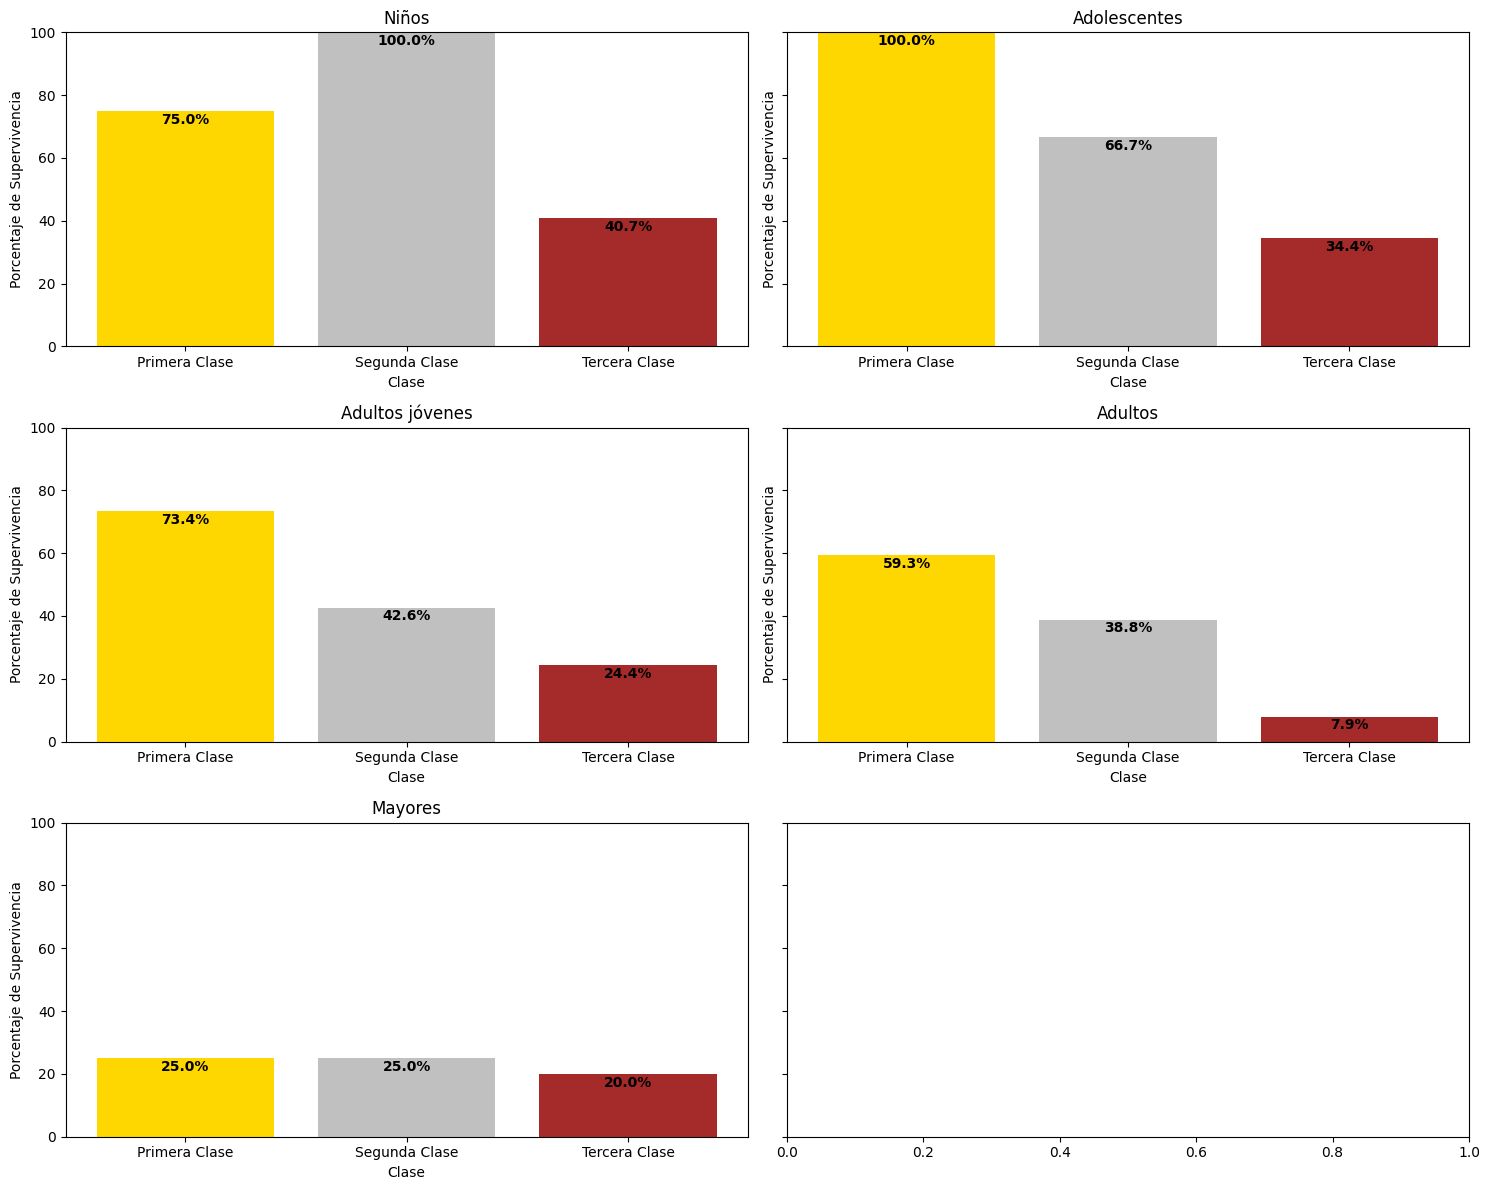

In [20]:
# Crear los grupos de edad
bins = [0, 12, 18, 35, 60, 80]
labels = ['Niños', 'Adolescentes', 'Adultos jóvenes', 'Adultos', 'Mayores']
df_Knn['AgeGroup'] = pd.cut(df_Knn['Age'], bins=bins, labels=labels, right=False)

# Agrupar por grupos de edad, clase y estado de supervivencia
age_class_survival = df_Knn.groupby(['AgeGroup', 'Pclass'])['Survived'].mean() * 100

# Crear una figura y ejes para múltiples subgráficas
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharey=True)
axes = axes.flatten()

# Filtrar las subgráficas vacías
valid_axes = [ax for i, ax in enumerate(axes) if i < len(age_class_survival.index.levels[0])]

# Definir colores para cada clase
colors = {1: 'gold', 2: 'silver', 3: 'brown'}

# Dibujar subgráficas para cada grupo de edad
for (age_group, ax) in zip(age_class_survival.index.levels[0], valid_axes):
    data = age_class_survival[age_group]
    bars = ax.bar(data.index, data.values, color=[colors[i] for i in data.index])
    ax.set_title(f'{age_group}')
    ax.set_xlabel('Clase')
    ax.set_ylabel('Porcentaje de Supervivencia')
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['Primera Clase', 'Segunda Clase', 'Tercera Clase'])
    ax.set_ylim(0, 100)

    # Añadir etiquetas de porcentaje en cada barra
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height - 5, f'{height:.1f}%', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Ajustar el espaciado
plt.tight_layout()
plt.show()


### Análisis de Supervivencia por Grupo de Edad y Clase

En este análisis, hemos dividido a los pasajeros del Titanic en distintos grupos de edad para investigar cómo la clase influyó en sus probabilidades de supervivencia dentro de cada segmento etario.

*La visualización presenta subgráficas para cada grupo de edad, mostrando el porcentaje de supervivientes en primera, segunda y tercera clase. Colores distintivos representan cada clase: oro para primera clase, plata para segunda clase y bronce para tercera clase.*

#### Observaciones Clave
- **Niños:** Los niños en primera clase tuvieron las tasas de supervivencia más altas.
- **Adolescentes:** La tasa de supervivencia varía notablemente entre clases.
- **Adultos Jóvenes y Adultos:** La clase sigue siendo un factor determinante, con mayores tasas de supervivencia.

---

### Análisis de Supervivencia por Grupos Familiares

En esta sección, analizaremos cuántos grupos de familias completos podemos encontrar, en qué clase viajaban cada uno y cuál fue su índice de supervivencia. Además, exploraremos si la clase también tuvo influencia en la supervivencia de estos grupos familiares.





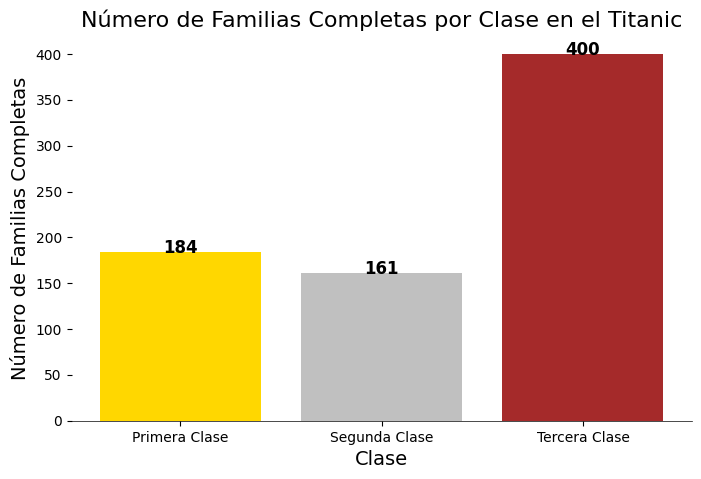

In [21]:
# Crear un identificador de familia basado en el apellido y el tamaño del grupo
df_Knn['LastName'] = df_Knn['Name'].apply(lambda x: x.split(',')[0])
df_Knn['FamilyID'] = df_Knn['LastName'] + '_' + df_Knn['SibSp'].astype(str) + df_Knn['Parch'].astype(str)

# Agrupar por FamilyID y clase para contar el número de familias por clase
family_class_counts = df_Knn.groupby(['FamilyID', 'Pclass']).size().unstack().notnull().sum()

# Crear la gráfica de barras para visualizar el número de familias completas por clase
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(family_class_counts.index, family_class_counts.values, color=['gold', 'silver', 'brown'])

# Añadir títulos y etiquetas
ax.set_title('Número de Familias Completas por Clase en el Titanic', fontsize=16)
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Número de Familias Completas', fontsize=14)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Primera Clase', 'Segunda Clase', 'Tercera Clase'])

# Añadir etiquetas de número en cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height - 5, f'{height}', ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')

# Mejorar la apariencia de la gráfica
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)

plt.show()


<bound method Spine.set of <matplotlib.spines.Spine object at 0x000001AE32162650>>

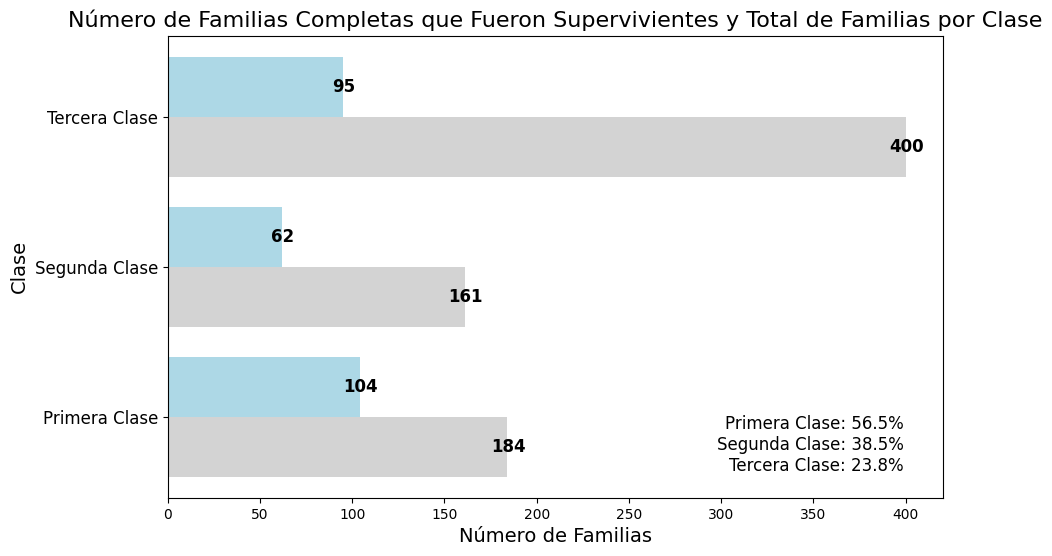

In [24]:
# Crear un identificador de familia basado en el apellido y el tamaño del grupo
df_Knn['LastName'] = df_Knn['Name'].apply(lambda x: x.split(',')[0])
df_Knn['FamilyID'] = df_Knn['LastName'] + '_' + df_Knn['SibSp'].astype(str) + df_Knn['Parch'].astype(str)

# Agrupar por FamilyID y calcular el número de supervivientes por familia
family_survival = df_Knn.groupby('FamilyID').agg({'Survived': ['sum', 'count'], 'Pclass': 'first'})

# Identificar familias completas que fueron supervivientes
family_survival.columns = ['Survived_Sum', 'Family_Size', 'Pclass']
family_survival['CompleteSurvival'] = family_survival['Survived_Sum'] == family_survival['Family_Size']
complete_survival_families = family_survival[family_survival['CompleteSurvival']]

# Contar el número de familias completas que fueron supervivientes por clase
family_class_survival = complete_survival_families.groupby('Pclass').size()

# Contar el número total de familias que viajaban en cada clase
total_families_per_class = df_Knn.groupby('Pclass')['FamilyID'].nunique()

# Calcular el porcentaje de familias completas que fueron supervivientes por clase
percent_family_survival = (family_class_survival / total_families_per_class) * 100

# Crear la gráfica de barras horizontales
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar las barras para el número total de familias
bars_total = ax.barh(total_families_per_class.index - 0.2, total_families_per_class.values, height=0.4, color='lightgrey', label='Total de Familias')

# Dibujar las barras para las familias completas que fueron supervivientes
bars_survived = ax.barh(family_class_survival.index + 0.2, family_class_survival.values, height=0.4, color='#ADD8E6', label='Familias Supervivientes')  # Azul muy claro

# Añadir títulos y etiquetas
ax.set_title('Número de Familias Completas que Fueron Supervivientes y Total de Familias por Clase', fontsize=16)
ax.set_xlabel('Número de Familias', fontsize=14)
ax.set_ylabel('Clase', fontsize=14)
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['Primera Clase', 'Segunda Clase', 'Tercera Clase'], fontsize=12)

# Añadir etiquetas de número en cada barra
for bar in bars_total:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='center', va='center', color='black', fontsize=12, fontweight='bold')

for bar in bars_survived:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='center', va='center', color='black', fontsize=12, fontweight='bold')

# Añadir cuadro con porcentajes dentro de la gráfica
percent_text = f'Primera Clase: {percent_family_survival[1]:.1f}%\nSegunda Clase: {percent_family_survival[2]:.1f}%\nTercera Clase: {percent_family_survival[3]:.1f}%'
props = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='none')
ax.text(0.95, 0.05, percent_text, transform=ax.transAxes, fontsize=12, verticalalignment='bottom', horizontalalignment='right', bbox=props)

# Mejorar la apariencia de la gráfica
ax.spines['top'].set

### Número de Familias Completas que Fueron Supervivientes y Total de Familias por Clase

En este análisis, hemos investigado la cantidad de familias completas que viajaban en el Titanic y su distribución por clase. Además, hemos identificado cuántas de estas familias completas sobrevivieron. La visualización se presenta en una gráfica de barras horizontales, diferenciando entre el número total de familias y las familias completas que sobrevivieron, utilizando colores distintivos:

- **Total de Familias (Gris claro)**: Representa el número total de familias que viajaban en cada clase.
- **Familias Supervivientes (Azul claro)**: Representa el número de familias completas que lograron sobrevivir.

#### Observaciones Clave
- **Primera Clase**: Muestra un número significativo de familias completas, y una proporción considerable de ellas logró sobrevivir.
- **Segunda Clase**: Tiene una cantidad moderada de familias completas, con algunas de ellas sobreviviendo.
- **Tercera Clase**: Presenta el mayor número de familias completas, pero una proporción menor de ellas logró sobrevivir, lo que refleja las desventajas enfrentadas por este grupo durante el desastre.

Esta visualización nos permite comprender mejor la dinámica de las familias completas en diferentes clases socioeconómicas y cómo influyó en sus probabilidades de supervivencia durante el evento trágico del Titanic.

---

# Resumen Final del Análisis Exploratorio de Datos (EDA) del Titanic 🚢

## Introducción
Este análisis exploratorio de datos (EDA) del Titanic nos ha permitido descubrir y entender los diversos factores que influenciaron la supervivencia de los pasajeros. A través de técnicas avanzadas de análisis de datos y visualización, hemos identificado patrones y tendencias que revelan las dinámicas socioeconómicas y demográficas a bordo del Titanic.

## Principales Hallazgos

### Distribución de Supervivientes y No Supervivientes
- **Total de pasajeros:** 891
- **Supervivientes:** 342 (38.4%)
- **No supervivientes:** 549 (61.6%)

*Visualización: Gráfica de barras mostrando el número de supervivientes y no supervivientes.*

### Supervivencia por Género
- **Mujeres:** 74.2% de supervivencia
- **Hombres:** 18.9% de supervivencia

*Visualización: Gráfica circular mostrando el porcentaje de supervivencia por género.*

### Supervivencia por Clase
- **Primera Clase:** 62.9%
- **Segunda Clase:** 47.2%
- **Tercera Clase:** 24.2%

*Visualización: Gráfica de barras horizontales mostrando la supervivencia por clase.*

### Análisis de Tarifas
- **Conclusión:** Las tarifas más altas mostraron una mayor tasa de supervivencia.

*Visualización: Gráfica de barras mostrando las tasas de supervivencia por cuartil de tarifa.*

### Supervivencia por Grupo de Edad y Clase
- **Niños:** Los niños en primera clase tuvieron las tasas de supervivencia más altas.
- **Adolescentes:** La tasa de supervivencia varía notablemente entre clases.
- **Adultos Jóvenes y Adultos:** La clase sigue siendo un factor determinante, con mayores tasas de supervivencia en clases superiores.
- **Mayores:** Los adultos mayores en primera clase también muestran una ventaja significativa en supervivencia.

*Visualización: Subgráficas mostrando el porcentaje de supervivientes en cada clase por grupo de edad.*

### Familias Completas
- **Número total de familias por clase:**
  - **Primera Clase:** 184 familias
  - **Segunda Clase:** 161 familias
  - **Tercera Clase:** 400 familias
- **Familias completas que sobrevivieron:**
  - **Primera Clase:** 104 familias supervivientes
  - **Segunda Clase:** 62 familias supervivientes
  - **Tercera Clase:** 95 familias supervivientes

*Visualización: Gráfica de barras horizontales mostrando el número total de familias y las familias completas que sobrevivieron por clase.*

#### Porcentajes de Supervivencia por Clase
- **Primera Clase:** 56.5%
- **Segunda Clase:** 38.5%
- **Tercera Clase:** 23.8%

## Conclusiones
- **Impacto del Género:** Las mujeres tuvieron una mayor tasa de supervivencia, reflejando las políticas de rescate que priorizaron a mujeres y niños.
- **Impacto de la Clase:** La clase socioeconómica influyó significativamente en las probabilidades de supervivencia, con tasas más altas para los pasajeros de primera clase.
- **Tarifas Pagadas:** Las tarifas más altas se correlacionaron con mayores tasas de supervivencia, posiblemente debido al acceso a mejores ubicaciones y recursos.
- **Supervivencia Familiar:** Un número limitado de familias completas sobrevivió, con una mayor representación en las clases más altas.

Este análisis proporciona una visión profunda de los factores que afectaron la supervivencia en el Titanic, destacando las desigualdades y dinámicas presentes durante el desastre. Esta información es valiosa para la comprensión histórica y ofrece lecciones importantes para mejorar las políticas de seguridad en situaciones de emergencia.

---

¡Este análisis nos permite desentrañar la complejidad de los eventos que ocurrieron a bordo del Titanic, revelando patrones que influyeron en la supervivencia de los pasajeros! 🚢📊
